In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

(1797, 64)
0


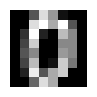

In [2]:
# 데이터 준비
from sklearn.datasets import load_digits

digits = load_digits()
X = digits['data']
y = digits['target']

print(X.shape)

print(y[0])
plt.figure(figsize=(1, 1))
# plt.imshow(X[0].reshape(1, 64), cmap="gray") # 이미지 표시
plt.imshow(X[0].reshape(8, 8), cmap="gray") # 이미지 표시
plt.axis("off")
plt.show()

In [3]:
# 3과 3이 아닌 숫자 분류 모델 만들기

from sklearn.linear_model import LogisticRegression

yis3 = (y==3).astype(int)
np.unique(yis3, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, yis3, stratify=yis3, random_state=42)


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [4]:
# logreg.score(X_train, y_train), logreg.score(X_test, y_test)

test_predicted = logreg.predict(X_test)
print( (test_predicted == y_test).sum() / len(y_test) ) # 정답의 갯수 / 전체 갯수 : 정확도 (accuracy)

dummy_predicted = np.zeros(len(y_test))
print( (dummy_predicted == y_test).sum() / len(y_test) )

0.98
0.8977777777777778


In [5]:
test_predicted_proba = logreg.predict_proba(X_test)

In [6]:
test_predicted_proba[:10]

array([[1.00000000e+00, 1.86968575e-17],
       [1.00000000e+00, 1.65694343e-19],
       [1.00000000e+00, 3.46578011e-18],
       [1.00000000e+00, 2.01620117e-11],
       [1.00000000e+00, 9.40398309e-19],
       [6.58778177e-01, 3.41221823e-01],
       [9.99999982e-01, 1.79738446e-08],
       [9.99999507e-01, 4.92927540e-07],
       [1.00000000e+00, 1.52579158e-10],
       [9.99999074e-01, 9.26316081e-07]])

In [7]:
test_predicted_score = logreg.decision_function(X_test)

In [8]:
test_predicted_score

array([-3.85181762e+01, -4.32441422e+01, -4.02035939e+01, -2.46272209e+01,
       -4.15079834e+01, -6.57854100e-01, -1.78343482e+01, -1.45229032e+01,
       -2.26033376e+01, -1.38920494e+01, -4.59459860e+01, -1.68578076e+01,
       -1.69882649e+01, -5.13192294e+01, -1.37331877e+01, -3.71365399e+01,
       -2.46320914e+01, -3.13535445e+01, -5.73294985e+01, -2.83958314e+01,
       -2.15805766e+01,  2.14749261e+01, -2.69901258e+01, -1.08094369e+01,
       -3.25276024e+00, -4.34307185e+01,  2.33236674e+01, -3.46249782e+01,
       -4.05772607e+01, -2.10150192e+01, -1.18042086e+01, -1.48058740e+01,
        2.93305122e+01, -7.26426637e+01, -4.14884079e+01, -4.57968829e+01,
       -4.31851353e+01, -3.12432663e+01, -9.57638242e+00, -2.27566255e+01,
       -4.97957045e+01,  1.06043322e+01, -2.50871452e+01,  2.52484607e+01,
       -6.46842157e+01, -4.19873069e+01,  1.98662334e+01, -1.88684210e+01,
       -1.47429850e+01, -2.21070849e+01, -3.02175560e+01,  2.84141730e+01,
       -2.45973049e+01, -

In [10]:
import pickle

with open('data-files/logreg-model.pickle', 'wb') as f:
    pickle.dump(logreg, f)

In [11]:
with open('data-files/logreg-model.pickle', 'rb') as f:
    logreg2 = pickle.load(f)